In [29]:
import numpy as np
from IPython.display import HTML
from shape_boat import *
from shape import *
%reload_ext autoreload
%autoreload 2
from multiboat_trajectory_optimization.boat_models import Boat

In [61]:
exp9 = 'results/example_9_pool/SHAPE_SHIFTING_LOG20190128_145534_numpy_GOOD.csv'
exp10 = 'results/example_10_pool/SHAPE_SHIFTING_LOG20190130_142123_numpy_GOOD.csv'

boat1_exp = np.genfromtxt(exp9,delimiter=',')
offset = 0
end_offset = 150
vals1 = boat1_exp[offset:-end_offset,:6]
refs1 = boat1_exp[offset:-end_offset,6:]
for x in [vals1, refs1]:
    x[:,0] -= 3.65
    x[:,1] -= 0.5
    x[:,2] += 0
    
S = np.zeros((3, vals1.shape[0],3))
S[0,:] = [-.45/2,0,np.pi/2]
S[1,:] = [-.45/2,0,np.pi/2]
S[2,:] = vals1[:,:3]


error = (vals1-refs1)**2
print 'avg_position_error', np.average((error[:,0]+error[:,1])**0.5)
print 'avg_angle_error', np.average(error[:,2]**0.5)*180/np.pi

avg_position_error 0.05899032181952442
avg_angle_error 2.8691879906880993


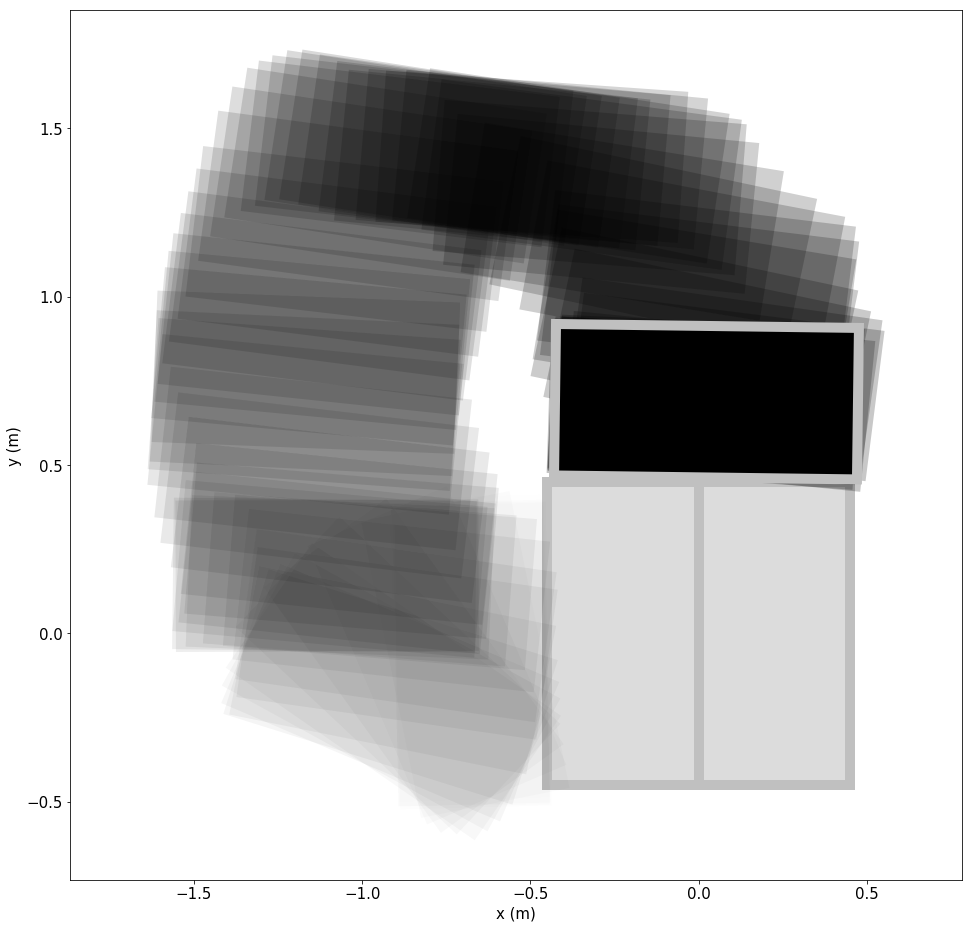

In [57]:
from matplotlib import pyplot as plt
plot = plt.subplots(nrows=1,ncols=1, figsize=(16,16))
b=Boat()
b.plot_configurations(S[:2],boat_color='gainsboro',edge_color='silver', edge_width=10, plot=plot)
b.plot_configurations(S[2:],boat_color='black',edge_color='silver', edge_width=10, plot=plot, stride=5)
plt.axis('equal')
plt.xlabel('x (m)', fontsize='15')
plt.ylabel('y (m)', fontsize='15')
plt.tick_params(labelsize='15')
plt.show()

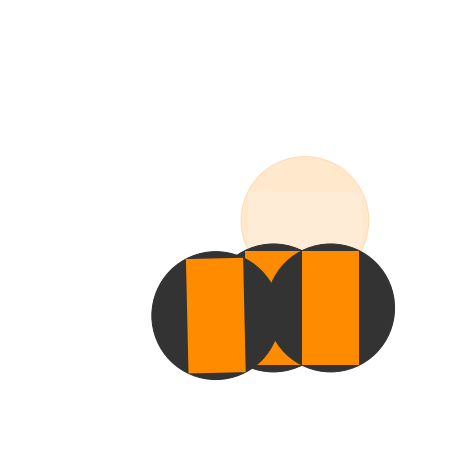

In [44]:
anim = b.plot_animation(S)

In [45]:
HTML(anim.to_html5_video())

In [ ]:
import pickle
with open('results/MIQP_result_slow.pickle', 'rb') as f:
    experiments = pickle.load(f)
#print experiments['spline init']['9_shinkyu1']

In [7]:
s=0.90625
shape_1a = Shape([Block(0,0,scale=s)])
shape_1b = Shape([Block(0,0,90,scale=s)])
shape_2a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s)])
shape_2b = Shape([Block(0,0.25,scale=s),   Block(0,-0.25,scale=s)])
shape_2c = Shape([Block(-.25,0,90,scale=s),Block(0.25,0,90,scale=s)])

In [8]:
tests = {
         '9_shinkyu1':          (shape_1b, shape_2c, (s*-.75, s*0.,     0.),  (s*-.25,  s*1.,    0.)),  \
         '10_shinkyu2':         (shape_1b, shape_2c, (s*-.75, s*0.,     0.),  (s*0.,    s*.75,   90)),  \
         '11_shinkyu3-1':       (shape_2c, shape_1b, (s*-.75, s*0.,     0.),  (s*0.,    s*1.,    0.)),  \
        }

SETTING ENDPOINTS
Calculated C-Space: 0.420830 seconds
Set up graph: 0.179836 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 26 4


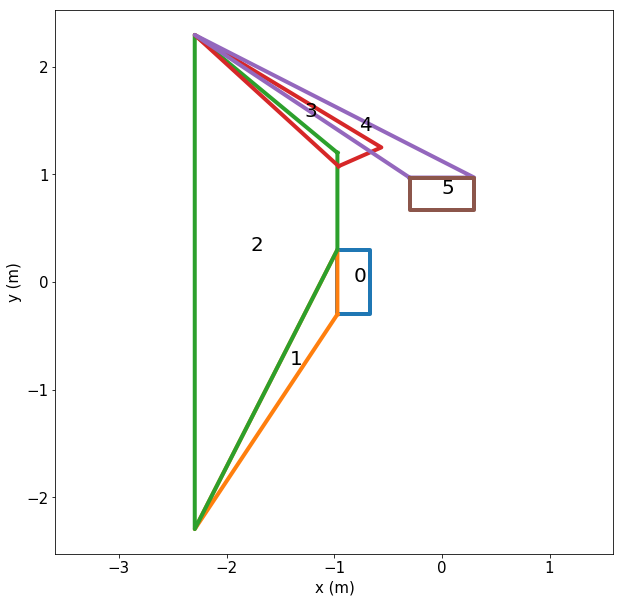

In [59]:
b = ShapeBoat_spline(*tests['10_shinkyu2'][:2])
x0 = np.zeros((1,6))
xN = np.zeros((1,6))
x0[0,:3] = tests['10_shinkyu2'][2] 
xN[0,:3] = tests['10_shinkyu2'][3] 

b.set_end_points(x0, xN)

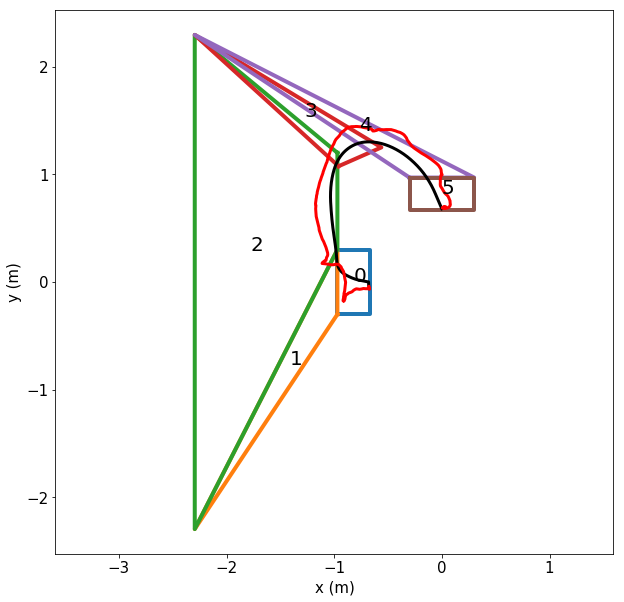

In [60]:
b.plot_hulls(S_knots=vals1.reshape((1,len(vals1),-1)),S=refs1.reshape((1,len(refs1),-1)))

In [27]:
print refs1.shape

(206, 6)


### Test refs for consistency 

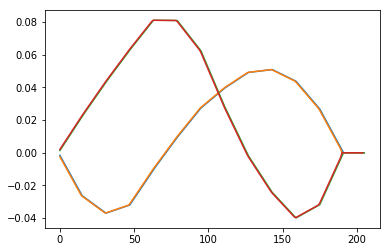

In [43]:
plt.plot(refs1[:,3])
plt.plot(5*(refs1[1:,0]-refs1[:-1,0]))

plt.plot(refs1[:,4])
plt.plot(5*(refs1[1:,1]-refs1[:-1,1]))